In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model
import math
from pathlib import Path
import os
import numpy as np

In [17]:
plt.close()

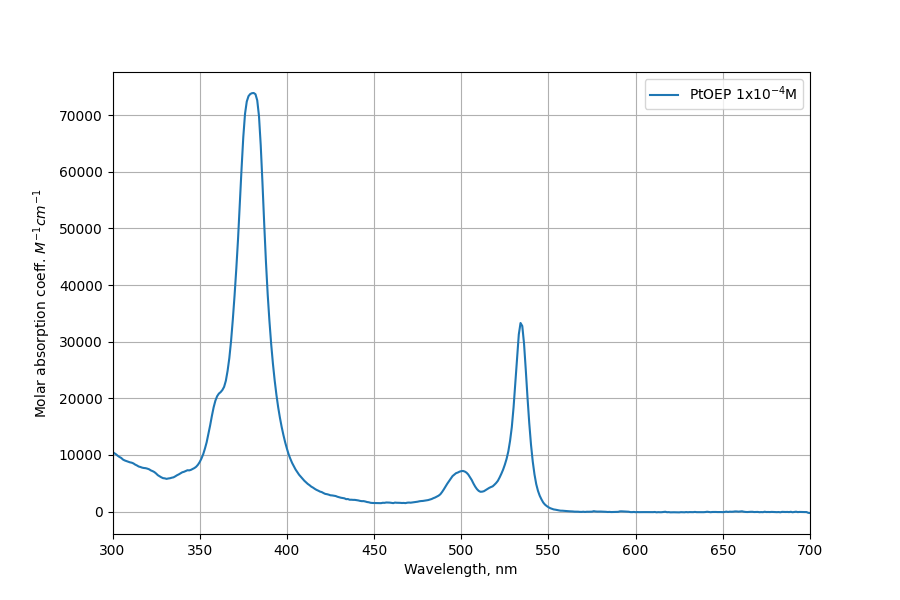

In [3]:
path = r'C:\Users\manvy\Desktop\FTMC\Duomenys'
dates = '20230201_DPA_PtOEP_abs'
Data_file = "Sensitizer"
Reference_file = 'THF'
comment = ''
Molar_conc = (3*(10**(-5)))
Molar_conc2 = (1*(10**(-5)))
dfx = pd.DataFrame()
fig5 = plt.figure(figsize = (9,6))

filenames = os.listdir(path + "\\" + dates)
filename = [f for f in filenames if Data_file in f and Reference_file not in f and '.csv' not in f and 'test' not in f]
names = [os.path.join(path + "\\" + dates, basename) for basename in filename]
names.sort()

lookupref = [f for f in filenames if Reference_file in f]
ref = [os.path.join(path + "\\" + dates, basename) for basename in lookupref]
df0 = pd.read_csv(ref[0], sep=';', decimal='.')
df0.columns = ['WL', 'SAMPLE', 'REF']
df0=df0.drop(df0.index[:20])
df0['SAMPLE'] = df0['SAMPLE'].map(float)
df0['WL'] = df0['WL'].map(float)
for f in names:

    df = pd.read_csv(f, sep=';', decimal='.')
    df.columns = ['WL', 'SAMPLE', 'REF']
    df=df.drop(df.index[:20])
    df['REF'] = df0['SAMPLE']
    df['SAMPLE'] = df['SAMPLE'].map(float)
    df['WL'] = df['WL'].map(float)
    
    # if "Perylene_3" in f:
    #     df['SAMPLE'] = (np.log10(df['REF']/df['SAMPLE']))/(5*(10**(-5)))
    # elif "ExScan2" in f:
    #     df['SAMPLE'] = (np.log10(df['REF']/df['SAMPLE']))/(2*(10**(-5)))
    # else:
    # if "Sensitizer" in f:
    #         df['SAMPLE2'] = (np.log10(df['REF']/df['SAMPLE']))/Molar_conc2*2.2
    # else:
    df['SAMPLE1'] = (np.log10(df['REF']/df['SAMPLE']))/(Molar_conc)
    df['SAMPLE2'] = (np.log10(df['REF']/df['SAMPLE']))/(0.2 * Molar_conc2)
    dfx['WL'] = df['WL']
    dfx['SAMPLE'] = df['SAMPLE1']
    plt.plot(df['WL'], df['SAMPLE1'], label = 'PtOEP 1x10' + '$^{-4}$M')
    # plt.plot(df['WL'], df['SAMPLE2'], label = 'PdTPTB 1x10' + '$^{-5}$M')

# plt.xlim(350, 460)
plt.xlim(300, 700)
# plt.ylim(-1000, 20000)
plt.legend()
plt.grid()
plt.xlabel('Wavelength, nm'); plt.ylabel('Molar absorption coeff. $M^{-1}cm^{-1}$')
plt.show()

# test_list  = [powers, Intensities]
# dfx = pd.DataFrame(test_list, index=['powers', 'intensities']).T
csvname = os.path.join(path + "\\" + dates)
dfx.to_csv(csvname + '\\' + Data_file +"-data.csv", index=None)